```matrix exponetial``` is defined as following:
$$ e^A = I + A +\frac{A^2}{2!}+...+\frac{A^m}{m!}+...$$

Properties of matrix exponetial
* If matrices A and B commute, then $e^{A+B} = e^Ae^B$
* A is a matrix and $e^A$ is inversible, then $(e^A)^{-1} = e^{-A}$
* A is a matrix and T is a non-singular matrix, then $e^{T^{-1}AT} = T^{-1}e^AT$
* A is a matrix, then $\frac{de^{At}}{dt} = Ae^{At}$  
For proofs and further information, please refer to the link https://en.wikipedia.org/wiki/Matrix_exponential

Let A be a $n\times n$ matrix, then the following differential equation
$$ \frac{dx_t}{dt} = Ax_t, x_0=x_0 $$
has the solution $x_t = e^{At}x_0$.

If matrix A has eigenvectors $ v_1, v_2,...v_n$, with corresponding eigenvalue $ \lambda_1, \lambda_2,...\lambda_n$, then 
$$\phi(t)=[e^{\lambda_{1} t}v_1,e^{\lambda_{2} t}v_2,...,e^{\lambda_{n} t}v_n]$$
is the basic solution matrix of above equation, and 
$e^{At} = \phi(t)@\phi^{-1}(0)$

In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [2]:
#input A
A = np.array([[6, -3],
       [2, 1]])

[4. 3.]
<class 'numpy.ndarray'>
(2,)
[[0.83205029 0.70710678]
 [0.5547002  0.70710678]]
[[3.32820118 2.12132034]
 [2.21880078 2.12132034]]
[[3.32820118 2.12132034]
 [2.21880078 2.12132034]]


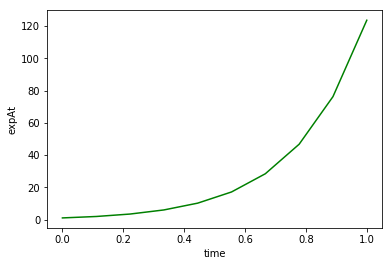

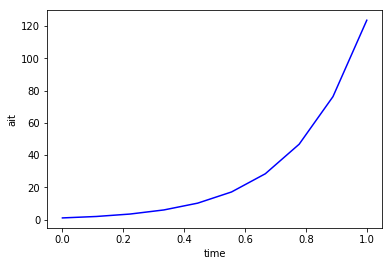

In [3]:
# time points
t = np.linspace(0,1,10)

#get eigenvalues and eigenvectors of A
eigenvalue,eigenvector=np.linalg.eig(A)
print(eigenvalue)
print(type(eigenvalue))
print(eigenvalue.shape)
print(eigenvector)
print(A@eigenvector)
print(eigenvalue.reshape(1,-1)*eigenvector)

# computer $e^{At}[0,0]$
expAt = []
for i in range(len(t)):
    exi = expm(A*t[i])[0,0]
    expAt.append(exi)

#computer the constant part of solution
eigenvector_inv = np.linalg.inv(eigenvector)

ait = []
for i in range(len(t)):
    c0 = (np.exp(eigenvalue[0]*t[i])*eigenvector[:,0]).reshape(-1,1)
    c1 = (np.exp(eigenvalue[1]*t[i])*eigenvector[:,1]).reshape(-1,1)
    ai = np.concatenate((c0,c1), axis=1)@eigenvector_inv
    # print(ai.shape)
    ait.append(ai[0,0])

plt.plot(t,expAt,'g')
plt.xlabel('time')
plt.ylabel('expAt')
plt.show()

plt.plot(t,ait,'b')
plt.xlabel('time')
plt.ylabel('ait')
plt.show()
